# SIT744 Assignment 2: Efficient Training of Convolutional Neural Network 

<div class="alert-info">
    <p>Due: <strong>9:00am 18 May 2020</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~20%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds


print(tf.__version__)
print(keras.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Using TensorFlow backend.


2.2.0
2.3.0-tf
Num GPUs Available:  1


### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~3%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [0]:
tfds.disable_progress_bar()

TRAIN_DS_SIZE = 48000
VALID_DS_SIZE = 6000
TEST_DS_SIZE = 6000

(fashion_mnist_train, fashion_mnist_valid, fashion_mnist_test), info = tfds.load('fashion_mnist', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

def preprocess(image,label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = image / 255
  return image, label

train_dataset = (fashion_mnist_train.map(preprocess).shuffle(buffer_size=50000).batch(128,drop_remainder=True).cache().repeat())
test_dataset=(fashion_mnist_test.map(preprocess).batch(128,drop_remainder=True).cache().repeat())
validation_dataset=(fashion_mnist_valid.map(preprocess).batch(128,drop_remainder=True).cache().repeat())

In [0]:
from tensorflow.keras.optimizers import Adam
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer = Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [40]:
BATCH_SIZE=128
EPOCHS=250
STEPS_PER_EPOCH=100
history=model.fit(train_dataset,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=validation_dataset,steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)


Epoch 1/250
100/100 [==============================] - 2s 15ms/step - loss: 1.2226 - accuracy: 0.5253 - val_loss: 0.7600 - val_accuracy: 0.7222
Epoch 2/250
100/100 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.7393 - val_loss: 0.6087 - val_accuracy: 0.7770
Epoch 3/250
100/100 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.7795 - val_loss: 0.5589 - val_accuracy: 0.8066
Epoch 4/250
100/100 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.7932 - val_loss: 0.5452 - val_accuracy: 0.8023
Epoch 5/250
100/100 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.8075 - val_loss: 0.4944 - val_accuracy: 0.8200
Epoch 6/250
100/100 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.8175 - val_loss: 0.5029 - val_accuracy: 0.8213
Epoch 7/250
100/100 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.8217 - val_loss: 0.4938 - val_accuracy: 0.823

In [41]:
loss_value,acc_value=model.evaluate(test_dataset,steps=50,verbose=0)
print("Accuracy of our model is ", acc_value*100)

Accuracy of our model is  88.37500214576721


The accuracy of our dense neural network is 88.3% as we can see from the output above.

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1),padding='same'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1),padding='same'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Dropout((0.5)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_dataset,validation_data=(validation_dataset),steps_per_epoch=100,validation_steps=100, epochs=10,batch_size=BATCH_SIZE)
test_loss = model.evaluate(test_dataset,verbose=0,steps=100)
print("The accuracy of our ConvNet model is", test_loss[1]*100)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)        

The classification accuracy after adding convolution layers has become 86.13%.


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~5%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

Trying to get the Same train,validation,test split as used for both DNN and ConvNet for Data Augmentation too as datagen.flow() only accepts numpy arrays and not datasets.

In [9]:
#FOR AUGMENTATION-SAME SPLIT
train_data, info = tfds.load('fashion_mnist', split=tfds.Split.TRAIN, with_info=True, as_supervised=True)

train_x = []
train_y = []
for sample in train_data:
    train_x.append(sample[0].numpy())
    train_y.append(tf.keras.utils.to_categorical(sample[1].numpy(), num_classes=10))

#train_x=tf.image.grayscale_to_rgb(train_x)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

train_x=train_x/255.0

x_train, x_remaining = np.split(train_x,[int(0.8 * train_x.shape[0])])
x_validation, x_test = np.split(x_remaining,[int(0.5 * x_remaining.shape[0])])

y_train, y_remaining = np.split(train_y,[int(0.8 * train_y.shape[0])])
y_validation, y_test = np.split(y_remaining,[int(0.5 * y_remaining.shape[0])])

print(x_train.shape,x_test.shape,x_validation.shape)

(48000, 28, 28, 1) (6000, 28, 28, 1) (6000, 28, 28, 1)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=128),shuffle=True,steps_per_epoch=x_train.shape[0] / 128, epochs=10,
                    validation_data=datagen.flow(x_validation,y_validation,batch_size=128),validation_steps=x_validation.shape[0]/128)

Epoch 1/10
375/375 [==============================] - 17s 47ms/step - loss: 0.6858 - accuracy: 0.7423 - val_loss: 0.5475 - val_accuracy: 0.7870
Epoch 2/10
375/375 [==============================] - 17s 46ms/step - loss: 0.4380 - accuracy: 0.8357 - val_loss: 0.3635 - val_accuracy: 0.8622
Epoch 3/10
375/375 [==============================] - 18s 47ms/step - loss: 0.3695 - accuracy: 0.8618 - val_loss: 0.3705 - val_accuracy: 0.8578
Epoch 4/10
375/375 [==============================] - 17s 46ms/step - loss: 0.3367 - accuracy: 0.8768 - val_loss: 0.3057 - val_accuracy: 0.8853
Epoch 5/10
375/375 [==============================] - 17s 47ms/step - loss: 0.3183 - accuracy: 0.8801 - val_loss: 0.2935 - val_accuracy: 0.8888
Epoch 6/10
375/375 [==============================] - 17s 47ms/step - loss: 0.2987 - accuracy: 0.8898 - val_loss: 0.2835 - val_accuracy: 0.8958
Epoch 7/10
375/375 [==============================] - 17s 47ms/step - loss: 0.2851 - accuracy: 0.8940 - val_loss: 0.2880 - val_accuracy:

In [11]:
aug=model.evaluate(x_test,y_test,steps=100,verbose=0)
print("Accuracy of model after data augmentation is ",aug[1]*100 )

Accuracy of model after data augmentation is  92.88333058357239


The model shows an accuracy of 92.8% over the test dataset after data augmentation using the ImageDataGenerator.





### Task 1.3 Fashion-MNIST with transfer learning

*(weight ~5%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [0]:
from tensorflow.keras.applications import VGG16


TRAIN_DS_SIZE = 48000
VALID_DS_SIZE = 6000
TEST_DS_SIZE = 6000

(fashion_mnist_train, fashion_mnist_valid, fashion_mnist_test), info = tfds.load('fashion_mnist', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

In [13]:
vgg16 = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(32,32,3),
                  classes=10)
vgg16.trainable = False
vgg16.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [14]:
IMAGE_SIZE = 32
def pre_process_image(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  image = tf.image.grayscale_to_rgb(image, name=None)
  print(image.shape)
  return image, label

TRAIN_BATCH_SIZE = 128
train_batches = fashion_mnist_train.map(pre_process_image).batch(TRAIN_BATCH_SIZE,drop_remainder=True).cache().repeat()
validation_batches = fashion_mnist_valid.map(pre_process_image).batch(TRAIN_BATCH_SIZE,drop_remainder=True).cache().repeat()
test_batches=fashion_mnist_test.map(pre_process_image).batch(TRAIN_BATCH_SIZE,drop_remainder=True).cache().repeat()

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [0]:
model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
history_transfer = model.fit(
    train_batches,
    epochs=15,
    steps_per_epoch=100,
    validation_data=(validation_batches),
    validation_steps=100
)

Epoch 1/15
100/100 [==============================] - 4s 43ms/step - loss: 2.3256 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.1037
Epoch 2/15
100/100 [==============================] - 3s 32ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.0965
Epoch 3/15
100/100 [==============================] - 3s 34ms/step - loss: 2.3028 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/15
100/100 [==============================] - 3s 28ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 5/15
100/100 [==============================] - 2s 22ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0984
Epoch 6/15
100/100 [==============================] - 2s 22ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.0965
Epoch 7/15
100/100 [==============================] - 2s 22ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0952

In [17]:
transfer_loss=model.evaluate(test_batches,steps=100,verbose=0)
print("Accuracy of the model with transfer learning is ",transfer_loss[1]*100)

Accuracy of the model with transfer learning is  9.562499821186066


In [18]:
#With fine-tuning
vgg16.trainable=True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg16.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7c2c1df1d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c2c1e2240> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c700cd908> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c700c68d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c700c6780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c700cfe48> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c700d1f28> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c7017d080> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c700d40f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c700d7160> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c700d6470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [19]:
model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history_finetune = model.fit(
    train_batches,
    epochs=15,
    steps_per_epoch=100,
    validation_data=(validation_batches),
    validation_steps=100
)

Epoch 1/15
100/100 [==============================] - 3s 29ms/step - loss: 2.3188 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 2/15
100/100 [==============================] - 3s 27ms/step - loss: 2.3027 - accuracy: 0.0943 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 3/15
100/100 [==============================] - 3s 27ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/15
100/100 [==============================] - 3s 27ms/step - loss: 2.3027 - accuracy: 0.1029 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 5/15
100/100 [==============================] - 3s 28ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0984
Epoch 6/15
100/100 [==============================] - 3s 27ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0965
Epoch 7/15
100/100 [==============================] - 3s 27ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0952

In [21]:
finetune_vgg=model.evaluate(test_batches,steps=100,verbose=0)
print("Accuracy of model after fine-tuning our transfer learning model is ",finetune_vgg[1]*100 )

Accuracy of model after fine-tuning our transfer learning model is  9.562499821186066


### Task 1.4 Performance comparison

*(weight ~2%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?



>Configuration | Accuracy Score
>--- | ---
>DNN | 88.3
>CNN | 86.13
>Data Augmentation | 92.8
>VGG16 | 9.56
>VGG16 with Fine-tuning | 9.56

The model with data augmentation has shown the highest accuracy. This has worked best because the model is now trained to several augmented versions of the training image and results in better accuracy.


## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

CPU Model:'Intel64 Family 6 Model 142 Stepping 9, GenuineIntel'

CPU Physical Cores: 4

CPU Clock Speed:cpufreq(current=2600.0, min=0.0, max=2701.0) in MHz

Number of GPU : 1

GPU Memory: 2048 MiB

GPU Model:GeForce 940MX 

In [0]:
#Commands used for 2.1.1 (RUN in COMMAND PROMPT)
# import nvidia_smi
# nvidia-smi --query-gpu=name,temperature.gpu,utilization.gpu,utilization.memory,memory.total,memory.free,memory.used --format=csv
# import psutil
# psutil.cpu_count()
# psutil.cpu_freq()
# import platform
# platform.processor()

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [23]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


x_validation, x_test = np.split(x_test,[int(0.8 * x_test.shape[0])])
y_validation, y_test = np.split(y_test,[int(0.8 * y_test.shape[0])])

170500096/170498071 [==============================] - 2s 0us/step


In [24]:
print(x_train.shape,x_test.shape,y_train.shape)

(50000, 32, 32, 3) (2000, 32, 32, 3) (50000, 10)


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3),padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3),padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2),padding='valid'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D((2,2),padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [26]:
cifar10_history=model.fit(x_train,y_train,epochs=15,validation_data=(x_validation,y_validation))

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3513 - accuracy: 0.5113 - val_loss: 1.0273 - val_accuracy: 0.6388
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9032 - accuracy: 0.6821 - val_loss: 0.8613 - val_accuracy: 0.7016
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7448 - accuracy: 0.7368 - val_loss: 0.7692 - val_accuracy: 0.7337
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6399 - accuracy: 0.7747 - val_loss: 0.7447 - val_accuracy: 0.7552
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5615 - accuracy: 0.8010 - val_loss: 0.7431 - val_accuracy: 0.7524
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4856 - accuracy: 0.8277 - val_loss: 0.7951 - val_accuracy: 0.7470
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4190 - accuracy: 0.8511 - val_loss: 0.7695 - val_accuracy:

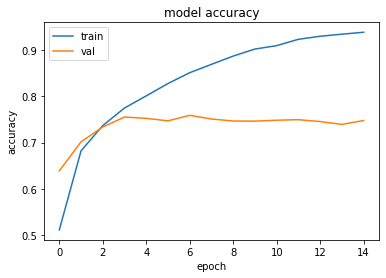

In [27]:
plt.plot(cifar10_history.history['accuracy'])
plt.plot(cifar10_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
cifar10_acc=model.evaluate(x_test,y_test)
print("The accuracy of building a shallow Convnet over CIFAR10 is ",cifar10_acc[1]*100)

63/63 [==============================] - 0s 4ms/step - loss: 1.2030 - accuracy: 0.7580
The accuracy of building a shallow Convnet over CIFAR10 is  75.80000162124634


#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
resnet_base=ResNet50(weights=None,include_top=False,input_shape=(32,32,3),classes=10)

In [0]:
resnet_base.trainable = True

In [0]:
def make_resmodel():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3),padding='same'),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3),padding='same'),
                                      tf.keras.layers.MaxPooling2D((2, 2),padding='valid'),
                                      tf.keras.layers.Dropout(0.25),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
                                      tf.keras.layers.MaxPooling2D((2,2),padding='valid'),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(10, activation='softmax')
                                      ])
  return model


In [0]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range=3,
                                    horizontal_flip=True)

In [33]:
model = make_resmodel()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(data_generator.flow(x_train, y_train,batch_size=128),
                    steps_per_epoch=x_train.shape[0]/128,
                    epochs=3,
                    validation_data=data_generator.flow(x_validation, y_validation,batch_size=128),
                    validation_steps=x_validation.shape[0]/128
                    )

Epoch 1/3
391/390 [==============================] - 31s 79ms/step - loss: 3.0168 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0970
Epoch 2/3
391/390 [==============================] - 30s 77ms/step - loss: 2.3038 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/3
391/390 [==============================] - 30s 76ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1020


In [34]:
resnet_loss=model.evaluate(x_test,y_test,steps=100,verbose=0)
print("Accuracy of the Resnet is ",resnet_loss[1]*100)

Accuracy of the Resnet is  9.200000017881393


### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [0]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)


In [36]:
model=make_resmodel()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(data_generator.flow(x_train, y_train,batch_size=128),
                    steps_per_epoch=x_train.shape[0]/128,
                    epochs=3,
                    validation_data=data_generator.flow(x_validation, y_validation,batch_size=128),
                    validation_steps=x_validation.shape[0]/128
                    )

Epoch 1/3
391/390 [==============================] - 29s 75ms/step - loss: 44924288.0000 - accuracy: 0.0998 - val_loss: 2.3178 - val_accuracy: 0.1016
Epoch 2/3
391/390 [==============================] - 30s 75ms/step - loss: 2.3100 - accuracy: 0.0990 - val_loss: 2.3082 - val_accuracy: 0.1001
Epoch 3/3
391/390 [==============================] - 29s 75ms/step - loss: 2.3103 - accuracy: 0.0977 - val_loss: 2.3068 - val_accuracy: 0.1014


In [37]:
resnet_loss=model.evaluate(x_test,y_test,steps=100,verbose=0)
print("Accuracy of the Resnet is ",resnet_loss[1]*100)

Accuracy of the Resnet is  8.699999749660492


### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

Training the CIFAR10 dataset with a shallow CNN shows better accuracy when compared to training a Resnet50.

---
**END OF ASSIGNMENT TWO**